# KNN FROM SCRATCH

- Implement KNN using Python loops without relying on libraries.

- Use np.argsort() to identify nearest neighbors.

- Apply majority voting using Counter for classification.

- Write clean fit() and predict() methods following ML conventions.

In [ ]:
import numpy as np
from collections import Counter

In [ ]:
class KNN:
  def __init__(self, k=3):
    self.k = k

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  def predict(self, X):
    predictions = [self._predict(x) for x in X]
    return np.array(predictions)

  def _predict(self, x):
    distances = [np.sqrt(np.sum((x - x_train) ** 2)) for x_train in self.X_train]
    k_ind = np.argsort(distances)[:self.k]
    k_nearest_labels = [self.y_train[i] for i in k_ind]
    mostCommon = Counter(k_nearest_labels).most_common(1)
    return mostCommon[0][0]




In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

df = datasets.load_iris()
X, y = df.data, df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
clf = KNN(3)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
accuracy = np.sum(predictions == y_test) / len(y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 97.37%


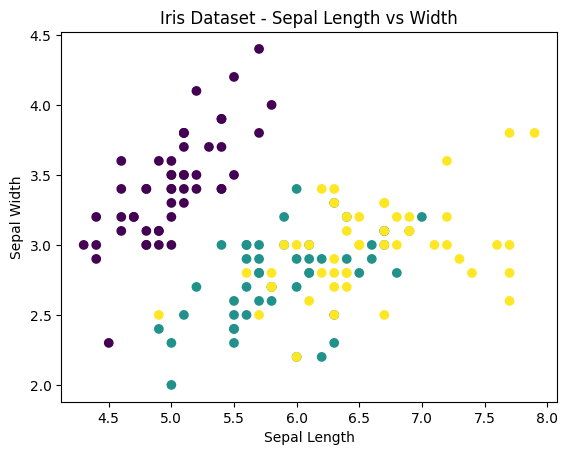

In [ ]:
import matplotlib.pyplot as plt
plt.figure()

plt.scatter(X[:, 0], X[:, 1], c=y)

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Iris Dataset - Sepal Length vs Width")

plt.show()

# Optimized Vectorized Implementation
To avoid looping through every training sample, we can use the expanded form of the squared Euclidean distance. For two vectors
$a$ and $b$:$$(a - b)^2 = a^2 + b^2 - 2ab$$When applied to matrices, this allows us to compute the distances using highly optimized matrix multiplication (dot products).

In [ ]:
class VectorizedKNN:
  def __init__(self, k=3):
    self.k = k

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  def predict(self, x):
    a_sq = np.sum(x**2, axis=1, keepdims=True)
    b_sq = np.sum(self.X_train**2, axis=1)
    dot_product = np.dot(x, self.X_train.T)

    distances = np.sqrt(a_sq + b_sq - 2 * dot_product)
    k_ind = np.argsort(distances, axis=1)[:, :self.k]
    k_nearest_labels = [self.y_train[i] for i in k_ind]
    predictions = [Counter(row).most_common(1)[0][0] for row in k_nearest_labels]
    return np.array(predictions)


# Vectorized KNN for Regression

In [ ]:
class VectorizedKNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        # Convert to numpy arrays to ensure indexing works
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def predict(self, x):
        # 1. Distance Calculation (Vectorized)
        a_sq = np.sum(x**2, axis=1, keepdims=True)
        b_sq = np.sum(self.X_train**2, axis=1)
        dot_product = np.dot(x, self.X_train.T)

        # Use np.maximum to avoid NaN from tiny negative numbers
        distances = np.sqrt(np.maximum(a_sq + b_sq - 2 * dot_product, 0))

        # 2. Find indices of k-nearest neighbors
        k_ind = np.argsort(distances, axis=1)[:, :self.k]

        # 3. Get labels (k_nearest_labels will be a 2D matrix)
        k_nearest_labels = self.y_train[k_ind]

        # 4. Voting per test point
        # We must loop over each row to get a prediction for each input
        predictions = [Counter(row).most_common(1)[0][0] for row in k_nearest_labels]

        return np.array(predictions)